Use the machine learning workflow to process and transform Pima India data setto create a prediction model
.This model must predict which people are likely to develop diabets with 70% or greater accuracy

In [1]:
import pandas as pd                 # pandas is a dataframe library
import matplotlib.pyplot as plt     # matplotlib.pyplot plots data
import numpy as np                  # numpy provides N-dim object support

# do ploting inline instead of in a separate window
%matplotlib inline


##LOAD AND REVIEW DATA

In [2]:
df = pd.read_csv("./data/pima-data.csv")      # load Pima data.  Adjust path as necessary

In [3]:
df.shape #number of rows ,columns

(768, 10)

In [4]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [5]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


Definition of features

From the metadata on the data source we have the following definition of the features.
Feature 	Description 	Comments
num_preg 	number of pregnancies
glucose_conc 	Plasma glucose concentration a 2 hours in an oral glucose tolerance test
diastolic_bp 	Diastolic blood pressure (mm Hg)
thickness 	Triceps skin fold thickness (mm)
insulin 	2-Hour serum insulin (mu U/ml)
bmi 	Body mass index (weight in kg/(height in m)^2)
diab_pred 	Diabetes pedigree function
Age (years) 	Age (years)
skin 	???? 	What is this?
diabetes 	Class variable (1=True, 0=False) 	Why is our data boolean (True/False)?

In [6]:
df.isnull().values.any()

False

Eaxample of high correlatio is size in inch and size in cms,remove one to enclure also does not weigh them twice

In [7]:
def plot_corr(df, size=10):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

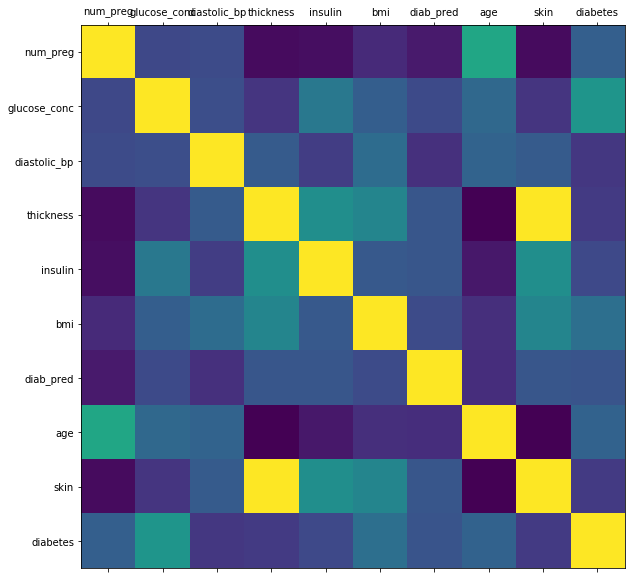

In [8]:
plot_corr(df)

In [9]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [10]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [11]:
del df['skin']

In [12]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


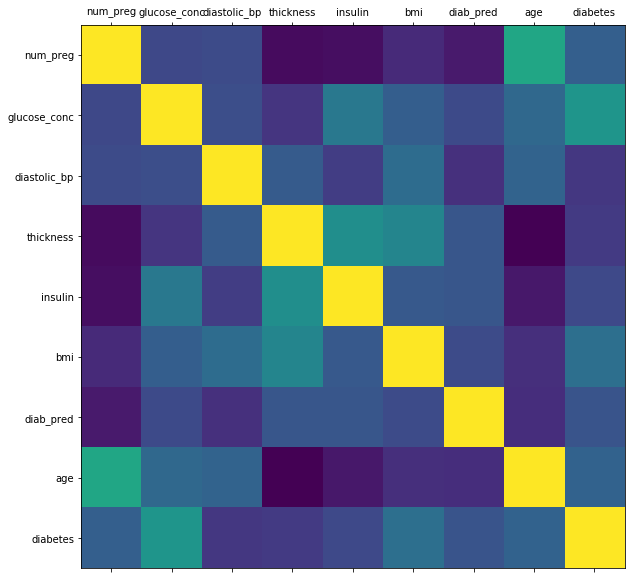

In [13]:
plot_corr(df)

MOuld the data,work best with numerical,remove categorial results only field has them true/false,we do using pandas map mtd

In [14]:
diabetes_map = {True : 1, False : 0}

In [15]:
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [16]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Make sure the data you train and predict is not rare,by doing the follwing



num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) * 100))



In [17]:
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) * 100))
#we have about 35% ppl with dia,we can use this for training

Number of True cases:  268 (34.90%)
Number of False cases: 500 (65.10%)


In [18]:
from sklearn.cross_validation import train_test_split

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

X = df[feature_col_names].values     # predictor feature columns (8 X m)
y = df[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)
split_test_size = 0.30
#SPLIT DATA IS RETURNED AS 4 NUMPI ARRAYS OF DATA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) 
                            # test_size = 0.3 is 30%, 42 is the answer to everything

/home/vijay/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

69.92% in training set
30.08% in test set


In [20]:
#len(X)
len(X_test)

231

#### Verifying predicted value was split correctly

In [21]:
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), (len(df.loc[df['diabetes'] == 1])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), (len(df.loc[df['diabetes'] == 0])/len(df.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))


Original True  : 268 (34.90%)
Original False : 500 (65.10%)

Training True  : 188 (35.01%)
Training False : 349 (64.99%)

Test True      : 80 (34.63%)
Test False     : 151 (65.37%)


### Post-split Data Preparation

In [22]:
#### Hidden Missing Values
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Are these 0 values possible?

How many rows have have unexpected 0 values?

In [23]:
print("# rows in dataframe {0}".format(len(df)))
print("# rows missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# rows missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# rows missing thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# rows missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# rows missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# rows missing diab_pred: {0}".format(len(df.loc[df['diab_pred'] == 0])))
print("# rows missing age: {0}".format(len(df.loc[df['age'] == 0])))

# rows in dataframe 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


In [24]:
#### Impute with the mean
#df['glucose_conc'] == 0
#len(df.loc[df['glucose_conc'] == 0])

In [25]:
from sklearn.preprocessing import Imputer

#Impute with mean all 0 readings
fill_0 = Imputer(missing_values=0, strategy="mean", axis=0)

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

In [26]:
print(y_train[0:5])
print(y_train.ravel()[0:5])

[[0]
 [0]
 [1]
 [0]
 [0]]
[0 0 1 0 0]


## Training Initial Algorithm - Naive Bayes


In [27]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel()) # ravel Return a flattened array.


GaussianNB(priors=None)

### Performance on Training Data


In [28]:
type(X_train)
X_train[0:1]

array([[  1.  ,  95.  ,  60.  ,  18.  ,  58.  ,  23.9 ,   0.26,  22.  ]])

In [29]:
# predict values using the training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy: 0.7542



In [30]:
### Performance on Testing Data


In [31]:
# predict values using the testing data
nb_predict_class = nb_model.predict(X_test)

from sklearn import metrics

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_class)))

Accuracy: 0.7359


In [32]:
#### Metrics

In [33]:
print("Confusion Matrix")
# Note the use of labels for set 1=True to upper left and 0=False to lower right
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_class, labels=[1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_class, labels=[1,0]))

#Column left predicted true,right predicted false;rows are actual values firt row actual true,bottm actual false
#TP FP
#FN TN  
#PERFECT CLASSIFIER
#80 0
#0 151
#RECALL = TP/(TP+FN)
#PRECISION = TP/(TP+FP)

Confusion Matrix
[[ 52  28]
 [ 33 118]]

Classification Report
             precision    recall  f1-score   support

          1       0.61      0.65      0.63        80
          0       0.81      0.78      0.79       151

avg / total       0.74      0.74      0.74       231



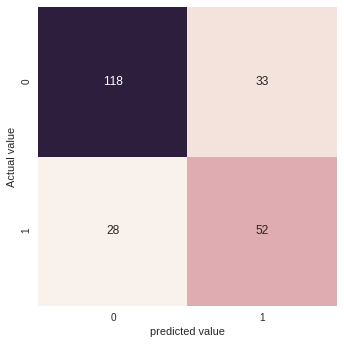

In [34]:
#from sklearn.preprocessing import binarize
#y_pred_class2 = binarize([y_pred_prob], 0.30)[0] 
from sklearn.metrics import confusion_matrix
import seaborn as sns
#import matplotlib.pyplot as plt
#%matplotlib inline
mat = confusion_matrix(y_test,nb_predict_class)
sns.heatmap(mat,square=True,annot=True,fmt='g',cbar=False)
#plt(figsize=(5,5))
plt.xlabel('predicted value')
plt.ylabel('Actual value')

In [35]:
confusion = metrics.confusion_matrix(y_test, nb_predict_class)
TP = confusion[1,1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [36]:
#RECALL FOR POSITIVE OR 1
print(TP/(TP+FN))
print(metrics.recall_score(y_test, nb_predict_class))

0.65
0.65


In [37]:
#RECALL FOR NEGATIVE OR 0
print(TN/(TN+FP))
print(metrics.recall_score(y_test, nb_predict_class))

0.781456953642
0.65


In [38]:
metrics.recall_score?

In [39]:
#PRECISION
TP/(TP+FP)

0.61176470588235299

In [40]:
print(metrics.accuracy_score(y_test,nb_predict_class))

0.735930735931


In [41]:
print(metrics.classification_report(y_test, nb_predict_class))

             precision    recall  f1-score   support

          0       0.81      0.78      0.79       151
          1       0.61      0.65      0.63        80

avg / total       0.74      0.74      0.74       231



In [43]:
type(nb_predict_class)

numpy.ndarray

## Random Forest

In [42]:
RandomForestClassifier?

Object `RandomForestClassifier` not found.


In [43]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)      # Create random forest object
rf_model.fit(X_train, y_train.ravel()) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [44]:
### Predict Training Data


In [45]:
rf_predict_train = rf_model.predict(X_train)
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 0.9870


In [46]:
#predict test data
rf_predict_class = rf_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_class)))

Accuracy: 0.7100


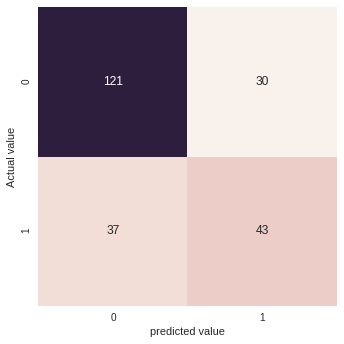

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#import matplotlib.pyplot as plt
#%matplotlib inline
mat = confusion_matrix(y_test,rf_predict_class)
sns.heatmap(mat,square=True,annot=True,fmt='g',cbar=False)
#plt(figsize=(5,5))
plt.xlabel('predicted value')
plt.ylabel('Actual value')

In [48]:
confusion = metrics.confusion_matrix(y_test, rf_predict_class)
TP = confusion[1,1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [49]:
print("recall :", TP/(TP+FN))
print("precision:", TP/(TP+FP))

recall : 0.5375
precision: 0.58904109589


In [50]:
print(metrics.classification_report(y_test, rf_predict_class))

             precision    recall  f1-score   support

          0       0.77      0.80      0.78       151
          1       0.59      0.54      0.56        80

avg / total       0.70      0.71      0.71       231



In [51]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42,oob_score=True)      # Make OOB score true Whether to 
#use out-of-bag samples to estimate the generalization accuracy.LIke cross validation
rf_model.fit(X_train, y_train.ravel()) 

/home/vijay/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/vijay/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=True, random_state=42,
            verbose=0, warm_start=False)

In [52]:
rf_predict_train = rf_model.predict(X_train)
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 0.9870


In [53]:
#predict test data
rf_predict_class = rf_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_class))) # no change in accuracy

Accuracy: 0.7100


## Logistic Regression

* Inverse of regularization strength C; must be a positive float.Like in support vector machines, smaller values specify stronger regularization.
* Regularization is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting. (lambda didvides one logisit equation coeffecient)
* defines how much should the algorithm focus on fitting the corner cases
* Another option is to use cross validation ( this is less usefull on ensomble methods)

In [63]:
from sklearn.linear_model import LogisticRegression

lr_model =LogisticRegression(C=0.7, random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_class = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_class)))
print(metrics.confusion_matrix(y_test, lr_predict_class, labels=[1, 0]) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_class, labels=[1,0]))

Accuracy: 0.7446
[[ 44  36]
 [ 23 128]]

Classification Report
             precision    recall  f1-score   support

          1       0.66      0.55      0.60        80
          0       0.78      0.85      0.81       151

avg / total       0.74      0.74      0.74       231



In [56]:
# scores are promising, but recall is not at best it can be one, but is just around 0.74

In [57]:
# lets see if method can be used automating the value for regulirization parameter(c val) and returning best recall

Setting regularization parameter

1st max value of 0.613 occured at C=1.400


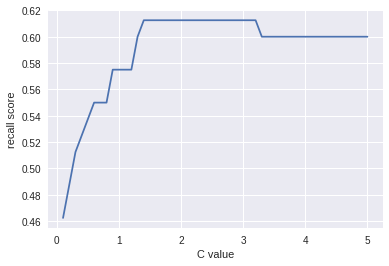

In [65]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")


In [66]:
### Logisitic regression with class_weight='balanced' recall is still not 0.7 we had more non diabetics than diabatecis
# this could be causing an unbalance
# pass class_weight = 'balanced'

1st max value of 0.738 occured at C=0.300


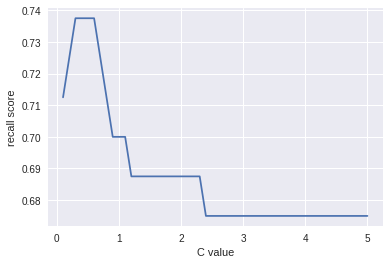

In [67]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")


In [68]:
print(best_score_C_val)
# lets use the learning set best C score and make class_weight balanced

0.30000000000000004


In [69]:
from sklearn.linear_model import LogisticRegression
lr_model =LogisticRegression( class_weight="balanced", C=best_score_C_val, random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test, labels=[1, 0]) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test, labels=[1,0]))
print(metrics.recall_score(y_test, lr_predict_test))

Accuracy: 0.7143
[[ 59  21]
 [ 45 106]]

Classification Report
             precision    recall  f1-score   support

          1       0.57      0.74      0.64        80
          0       0.83      0.70      0.76       151

avg / total       0.74      0.71      0.72       231

0.7375


## success more than 70% accuracy ie recall in predicting dibatees

In [57]:
# keep test SET aside
# split tarining into multiple slots to train and vlidate
# for each fold determine the best hyper parameter
# set the model hyperparameter to average best

### LogisticRegressionCV,helps us do this k fold cross vaidation, it is an ensomble version of logistic reg

In [84]:
#Cs : list of floats | int Each of the values in Cs describes the inverse of regularization strength. 
# number of times it will try to find best regulirazation values.

#cv : integer or cross-validation generator The default cross-validation generator used is Stratified K-Folds. If an integer is provided, then it is the number of folds used.
# jobs -1 use all cores
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced")  # set number of jobs to -1 which uses all cores to parallelize
lr_cv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
           refit=False, scoring=None, solver='lbfgs', tol=0.0001,
           verbose=0)

In [85]:
### Predict on Test data

In [86]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test, labels=[1, 0]) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test, labels=[1,0]))

Accuracy: 0.7056
[[ 54  26]
 [ 42 109]]

Classification Report
             precision    recall  f1-score   support

          1       0.56      0.68      0.61        80
          0       0.81      0.72      0.76       151

avg / total       0.72      0.71      0.71       231



In [87]:
# although recall is not as good as in previous step, this will perform better on real world data

* girlfriend suprised you over last 10 birthday,she asks how many surprises have u got?
   A number of events you can correctly recall = True positive (they’re correct and you recall them)

    A number of all correct events = True positive (they’re correct and you recall them) + False negative (they’re correct but you don’t recall them)

    A number of all events you recall = True positive (they’re correct and you recall them) + False positive (they’re not correct but you recall them)

    recall = True positive / (True positive + False negative)

    precision = True positive / (True positive + False positive)

To make myself able to remember their meaning without thinking about true positive/false positive/false negative jargon, I conceptualize them as follows:

Imagine that, your girlfriend gave you a birthday surprise every year in last 10years. (Sorry, I didn’t intend to depress you if you don’t have one.)

However, one day, your girlfriend asks you:

    ‘Sweetie, do you remember all birthday surprises from me?’

This simple question makes your life in danger.

To extend your life, you need to recall all 10 surprising events from your memory.

So, recall is the ratio of a number of events you can correctly recall to a number of all correct events.

If you can recall all 10 events correctly, then, your recall ratio is 1.0 (100%). If you can recall 7 events correctly, your recall ratio is 0.7 (70%).

Now, it’s easier to map the word recall to real life usage of that word.

However, you might be wrong in some answers.

For example, you answers 15 times, 10 events are correct and 5 events are wrong. This means you can recall all events but it’s not so precise.

So, precision is the ratio of a number of events you can correctly recall to a number all events you recall (mix of correct and wrong recalls). In other words, it is how precise of your recall.

From the previous example (10 real events, 15 answers: 10 correct answers, 5 wrong answers), you get 100% recall but your precision is only 66.67% (10 / 15).

Yes, you can guess what I’m going to say next. If a machine learning algorithm is good at recall, it doesn’t mean that algorithm is good at precision. That’s why we also need F1 score which is the (harmonic) mean of recall and precision to evaluate an algorithm.